# Evolution of Movie Genres Over Time 
#### How have movie preferences shifted from 2000-2022? What are potential factors that influence this?
   - socioeconomic factors.. inflation rates? debt rates? idk

In [57]:
import pandas as pd 
import numpy as np 
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from collections import defaultdict
from collections import Counter
import itertools

In [48]:
api_key = '6aeabc3b9751cf840015258449310415'

In [49]:
def get_genres():
    """Retrieve the list of movie genres."""
    url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}"
    response = requests.get(url)
    genres = response.json()['genres']
    return pd.DataFrame(genres)

def search_person(person_name):
    """Search for a person and return their details."""
    url = f"https://api.themoviedb.org/3/search/person?query={person_name}&api_key={api_key}"
    response = requests.get(url)
    return pd.DataFrame(response.json()['results'])

# Example usage
genres_df = get_genres()
print(genres_df)

actor_details_df = search_person("Tom Hanks")
print(actor_details_df)

       id             name
0      28           Action
1      12        Adventure
2      16        Animation
3      35           Comedy
4      80            Crime
5      99      Documentary
6      18            Drama
7   10751           Family
8      14          Fantasy
9      36          History
10     27           Horror
11  10402            Music
12   9648          Mystery
13  10749          Romance
14    878  Science Fiction
15  10770         TV Movie
16     53         Thriller
17  10752              War
18     37          Western
   adult  gender  id known_for_department       name original_name  \
0  False       2  31               Acting  Tom Hanks     Tom Hanks   

   popularity                      profile_path  \
0       81.69  /xndWFsBlClOJFRdhSt4NBwiPq2o.jpg   

                                           known_for  
0  [{'adult': False, 'backdrop_path': '/qdIMHd4sE...  


In [50]:
def get_genres():
    """Fetch the list of genres from the TMDb API."""
    url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}"
    response = requests.get(url)
    return pd.DataFrame(response.json()['genres'])

genres_df = get_genres()


def get_movies_by_year_genre(year):
    """Get movies released in a specific year and count by genre."""
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&sort_by=popularity.desc&primary_release_year={year}"
    response = requests.get(url)
    movies = response.json()['results']
    genre_counts = defaultdict(int)
    for movie in movies:
        for genre_id in movie['genre_ids']:
            genre_counts[genre_id] += 1
    return genre_counts


# Get movie counts by genre for a range of years
years = range(2000, 2021)  # Replace with your desired range of years
genre_popularity = defaultdict(lambda: defaultdict(int))

for year in years:
    genre_counts = get_movies_by_year_genre(year)
    for genre_id, count in genre_counts.items():
        genre_name = genres_df.loc[genres_df['id'] == genre_id, 'name'].values[0]
        genre_popularity[genre_name][year] += count

# Convert the nested dictionary to a DataFrame for analysis
genre_popularity_df = pd.DataFrame(genre_popularity).fillna(0)
print(genre_popularity_df)

      Family  Comedy  Fantasy  Animation  Adventure  Action  Drama  Romance  \
2000       6       8        4          5          4       4      8      2.0   
2001       4      10        6          3          5       7      4      6.0   
2002       8       8        5          7          9       6      6      2.0   
2003       6      10        8          3          8      10      1      2.0   
2004       9      10        8          8          9       3      3      3.0   
2005       4       5        6          3          9       7      6      2.0   
2006       2       7        2          3          5       6      8      3.0   
2007       5       7        8          6          7       7      2      0.0   
2008       5       2        5          4          9      10      5      3.0   
2009       5       5        7          5          6       4      5      4.0   
2010       7       5        7          5         10       6      4      4.0   
2011       4       6        4          5          8 

In [51]:
data = genre_popularity_df.reset_index()

In [52]:
data = data.rename(columns={'index':'Year'})
data = data.astype({col: 'int' for col in data.select_dtypes('float64').columns})
data

,Year,Family,Comedy,Fantasy,Animation,Adventure,Action,Drama,Romance,Thriller,Horror,History,War,Mystery,Crime,Science Fiction,Documentary,TV Movie,Music,Western
0,2000,6,8,4,5,4,4,8,2,4,1,1,1,1,3,0,0,0,0,0
1,2001,4,10,6,3,5,7,4,6,1,0,2,2,0,2,1,1,0,0,0
2,2002,8,8,5,7,9,6,6,2,3,0,0,0,2,1,3,0,1,1,0
3,2003,6,10,8,3,8,10,1,2,5,1,0,0,0,2,4,0,0,0,0
4,2004,9,10,8,8,9,3,3,3,1,1,1,1,2,2,3,0,1,0,0
5,2005,4,5,6,3,9,7,6,2,6,4,1,1,1,6,1,0,0,0,0
6,2006,2,7,2,3,5,6,8,3,6,2,0,1,2,2,2,0,1,0,0
7,2007,5,7,8,6,7,7,2,0,7,4,0,1,2,2,2,0,0,0,0
8,2008,5,2,5,4,9,10,5,3,7,1,1,2,0,2,5,0,0,0,0
9,2009,5,5,7,5,6,4,5,4,4,2,0,1,3,1,3,0,0,0,0


In [54]:
years = range(1997, 2022)
movies_data = []

def get_director_and_cast(movie_id):
    """Fetch the director and top-billed cast of the movie by movie_id."""
    response = requests.get(
        f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}'
    )
    credits = response.json()
    director_name = None
    top_billed_cast = []
    
    for crew_member in credits.get('crew', []):
        if crew_member['job'] == 'Director':
            director_name = crew_member['name']
            break
    
    for cast_member in credits.get('cast', [])[:1]:  # Get only the top-billed cast member
        top_billed_cast.append(cast_member['name'])

    return director_name, top_billed_cast[0] if top_billed_cast else None

genres_response = requests.get(
    f'https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}'
)
genres_list = genres_response.json()['genres']
genre_id_to_name = {genre['id']: genre['name'] for genre in genres_list}

def get_movie_revenue_and_production_companies(movie_id):
    """Fetch revenue and production companies for the movie by movie_id."""
    details_response = requests.get(
        f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    )
    details = details_response.json()
    revenue = details.get('revenue', 0)
    production_companies = [company['name'] for company in details.get('production_companies', [])]
    return revenue, production_companies

for year in years:
    # Fetch the top-rated movies for the year with a sufficient number of votes to ensure data reliability
    response = requests.get(
        f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}&sort_by=vote_average.desc&primary_release_year={year}&vote_count.gte=500&page=1'
    )
    movies = response.json()['results']
    
    for movie in movies:
        movie_id = movie['id']
        director_name, top_cast_member = get_director_and_cast(movie_id)
        movie_genres = [genre_id_to_name[genre_id] for genre_id in movie['genre_ids'] if genre_id in genre_id_to_name]
        revenue, production_companies = get_movie_revenue_and_production_companies(movie_id)

        movies_data.append({
        'ID': movie_id,
        'Title': movie['title'],
        'Year': year,
        'Rating': movie['vote_average'],
        'Genres': movie_genres,  # Here we're adding the actual genre names
        'Director': director_name,
        'Top_Cast_Member': top_cast_member,
        'Revenue': revenue, 
        'Production_Companies': production_companies
        # ... other fields
    })
        
        # Stop once we have 500 movies
        if len(movies_data) >= 500:
            break
    if len(movies_data) >= 500:
        break

# Convert to DataFrame
df_movies = pd.DataFrame(movies_data)
df_movies

,ID,Title,Year,Rating,Genres,Director,Top_Cast_Member,Revenue,Production_Companies
0,637,Life Is Beautiful,1997,8.5,"[Comedy, Drama]",Roberto Benigni,Roberto Benigni,230098753,"[Mario e Vittorio Cecchi Gori - C.E.I.A.D., Me..."
1,128,Princess Mononoke,1997,8.3,"[Adventure, Fantasy, Animation]",Hayao Miyazaki,Youji Matsuda,169000000,"[Studio Ghibli, Nibariki, dentsu Music And Ent..."
2,18491,Neon Genesis Evangelion: The End of Evangelion,1997,8.3,"[Animation, Science Fiction, Action, Drama]",Hideaki Anno,Megumi Ogata,20000000,"[GAINAX, movic, Star Child Recording, TV Tokyo..."
3,489,Good Will Hunting,1997,8.1,[Drama],Gus Van Sant,Matt Damon,225933435,"[Miramax, Lawrence Bender Productions, Be Gent..."
4,38286,Three Men and a Leg,1997,8.0,[Comedy],Massimo Venier,Aldo Baglio,0,"[Rodeo Drive, A.Gi.Di., Medusa Film]"
...,...,...,...,...,...,...,...,...,...
495,527774,Raya and the Last Dragon,2021,7.9,"[Animation, Family, Fantasy, Action, Adventure]",Don Hall,Kelly Marie Tran,130423032,"[Walt Disney Pictures, Walt Disney Animation S..."
496,508943,Luca,2021,7.9,"[Animation, Comedy, Fantasy, Adventure, Family]",Enrico Casarosa,Jacob Tremblay,49750471,"[Pixar, Walt Disney Pictures]"
497,776305,Belle,2021,7.8,"[Animation, Science Fiction, Family]",Mamoru Hosoda,Kaho Nakamura,63501160,"[Studio Chizu, Nippon Television Network Corpo..."
498,438631,Dune,2021,7.8,"[Science Fiction, Adventure]",Denis Villeneuve,Timothée Chalamet,402027830,[Legendary Pictures]


In [93]:
df_movies.to_csv('MovieData.csv')

## Start of EDA

1. Rating Dist over the years

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


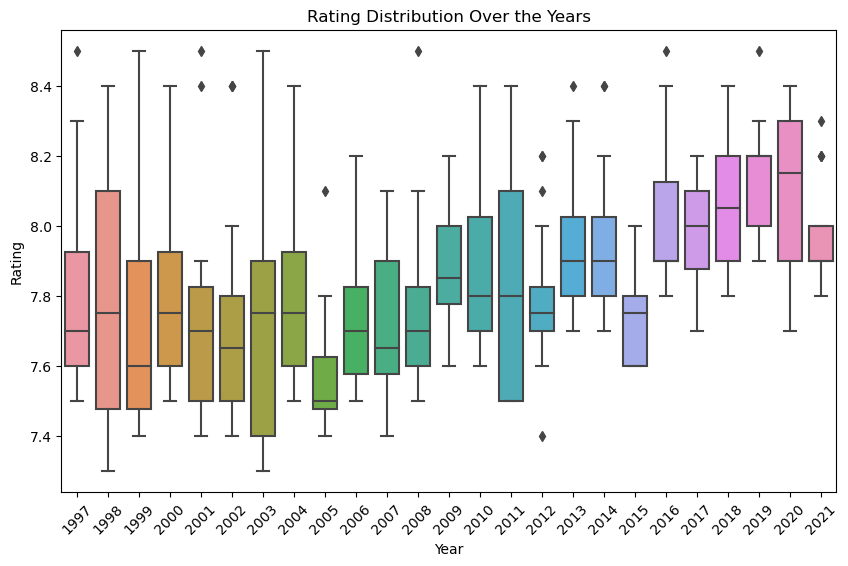

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Rating', data=df_movies)
plt.xticks(rotation=45)
plt.title('Rating Distribution Over the Years')
plt.show()

average rating has increased over the past 25 years... this could ba attributed to improvements in the filmmaking process, new technology? 

2. Most Common Genres

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version

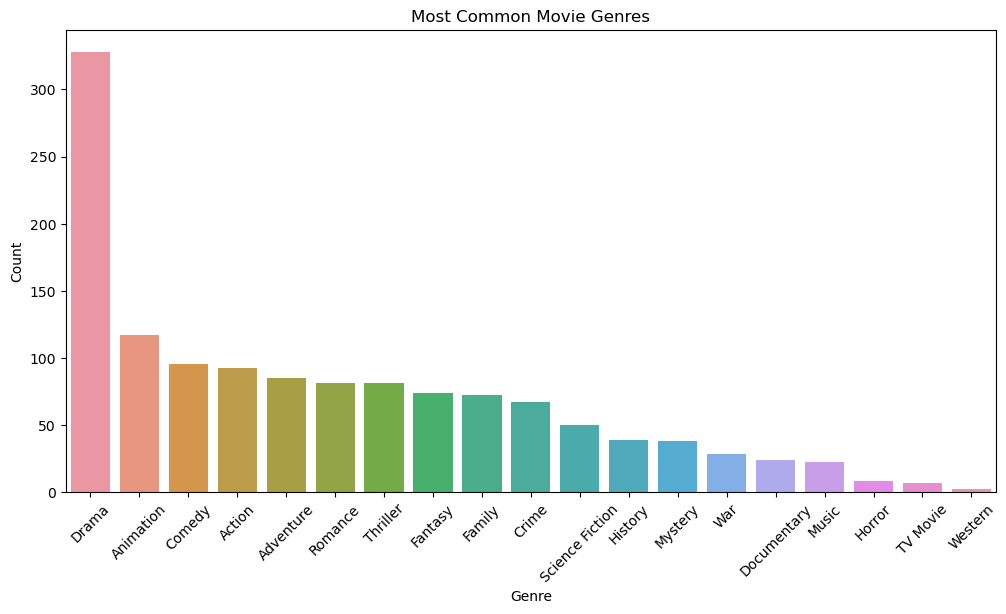

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Most Common Movie Genres')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

3. Revenue Trends

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

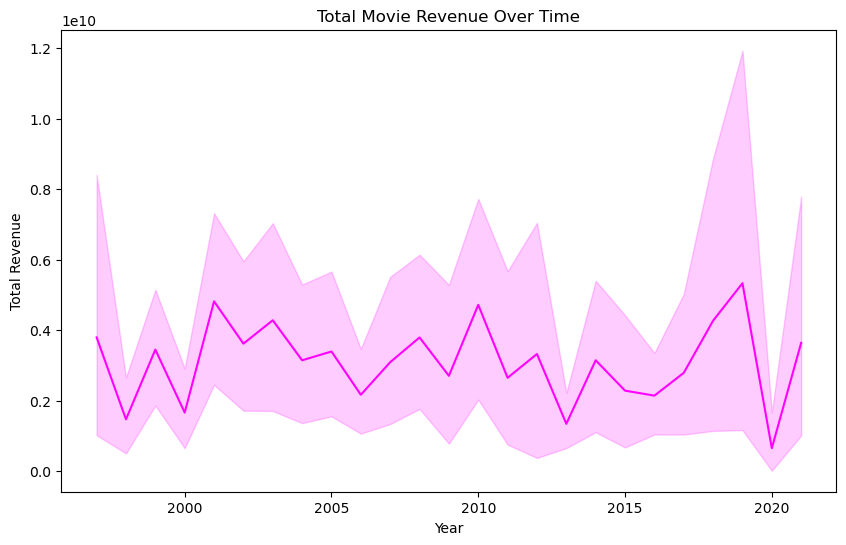

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Revenue', data=df_movies, estimator=sum, color='magenta')
plt.title('Total Movie Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Year')
plt.show()

4. Top Directors by Average Rating

** i will be omitting R*man P*lanski from this bc he sucks 

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

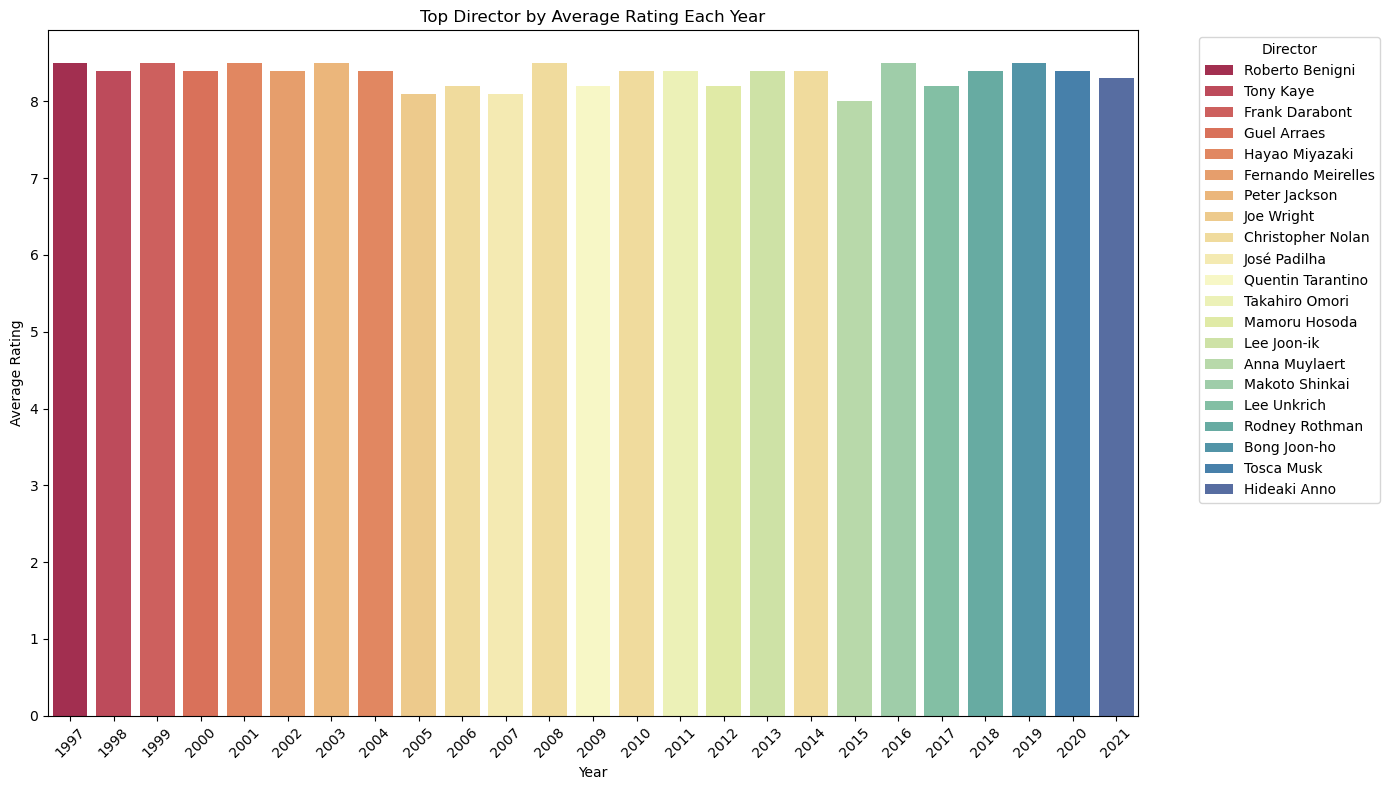

In [65]:
directors_yearly = df_movies.groupby(['Year', 'Director'])['Rating'].mean().reset_index()

top_directors_yearly = directors_yearly.loc[directors_yearly.groupby('Year')['Rating'].idxmax()]

plt.figure(figsize=(14, 8))
sns.barplot(
    x='Year',
    y='Rating',
    hue='Director',
    data=top_directors_yearly,
    dodge=False,
    palette='Spectral'
)
plt.xticks(rotation=45)
plt.title('Top Director by Average Rating Each Year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

5. Stacked bar chart showing the genres for those^ directors

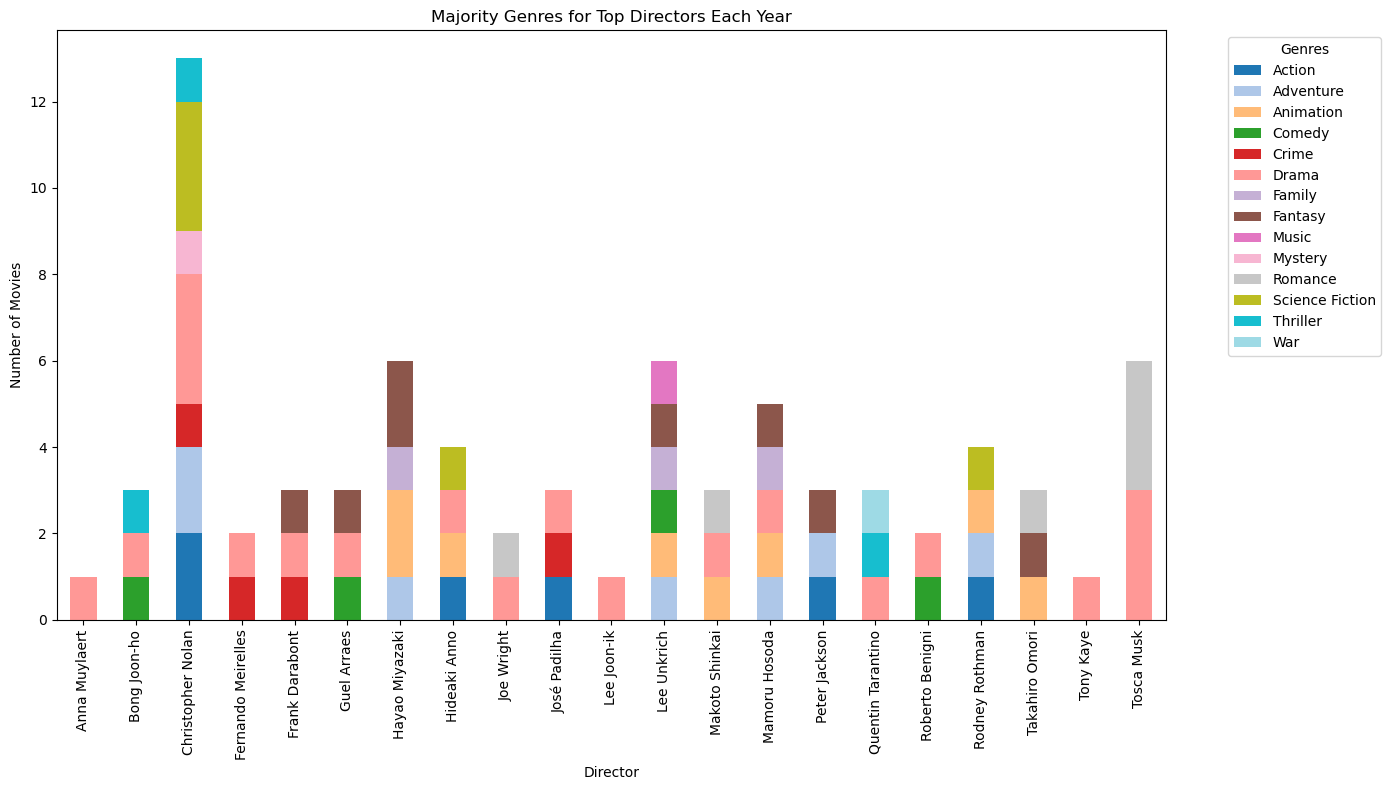

In [69]:
df_movies['Genres'] = df_movies['Genres'].apply(lambda x: x if isinstance(x, list) else [x])
top_directors_genres = df_movies.groupby(['Year', 'Director'])['Genres'].sum().reset_index()
top_director_each_year = top_directors_genres.loc[top_directors_yearly.groupby('Year')['Rating'].idxmax()]
top_director_genres_exploded = top_director_each_year.explode('Genres')
genre_counts_pivot = top_director_genres_exploded.pivot_table(index='Director', columns='Genres', aggfunc='size', fill_value=0)

genre_counts_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Majority Genres for Top Directors Each Year')
plt.ylabel('Number of Movies')
plt.xlabel('Director')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

6. Barplot of Average Revenue by Production Company

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


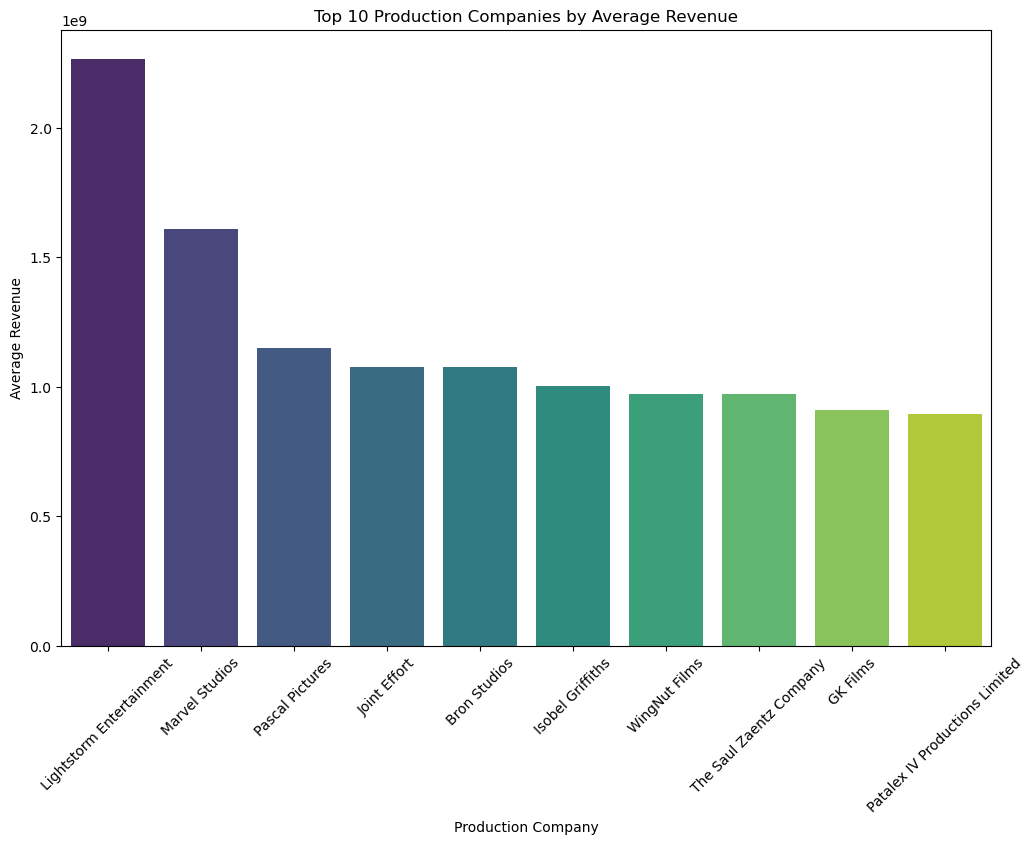

In [75]:
df_exploded = df_movies.explode('Production_Companies')
avg_revenue_by_company = df_exploded.groupby('Production_Companies')['Revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_revenue_by_company.index, y=avg_revenue_by_company.values, palette='viridis')
plt.title('Top 10 Production Companies by Average Revenue')
plt.ylabel('Average Revenue')
plt.xlabel('Production Company')
plt.xticks(rotation=45)
plt.show()

7. Gender Diversity in Top Films

In [79]:
def get_gender_diversity(movie_id):
    cast_crew_response = requests.get(
        f'https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}'
    )
    cast_crew_data = cast_crew_response.json()
    genders = {
        'female': 0,
        'male': 0,
        'unknown': 0
    }
    for person in cast_crew_data.get('cast', []) + cast_crew_data.get('crew', []):
        if person['gender'] == 1:
            genders['female'] += 1
        elif person['gender'] == 2:
            genders['male'] += 1
        else:
            genders['unknown'] += 1
    return genders

# Collect gender diversity data
for index, row in df_movies.iterrows():
    diversity_data = get_gender_diversity(row['ID'])
    df_movies.at[index, 'Female'] = diversity_data['female']
    df_movies.at[index, 'Male'] = diversity_data['male']
    df_movies.at[index, 'Unknown'] = diversity_data['unknown']


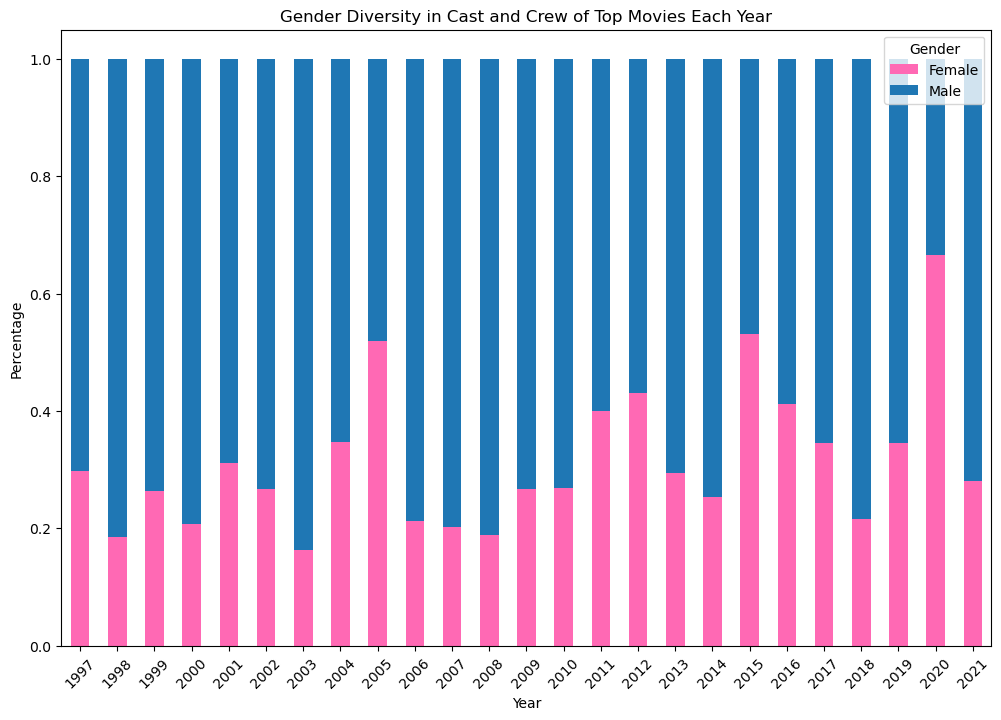

In [83]:
top_film_each_year = df_movies.loc[df_movies.groupby('Year')['Rating'].idxmax()]
top_film_each_year['Female_Ratio'] = top_film_each_year['Female'] / (top_film_each_year['Female'] + top_film_each_year['Male'])
top_film_each_year['Male_Ratio'] = top_film_each_year['Male'] / (top_film_each_year['Female'] + top_film_each_year['Male'])

plot_data = top_film_each_year[['Year', 'Female_Ratio', 'Male_Ratio']].set_index('Year')
colors = ['#FF69B4', '#1F77B4']  

plot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Gender Diversity in Cast and Crew of Top Movies Each Year')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

8. Revenue vs Budget 

In [85]:
def get_movie_budget(movie_id):
    """Fetch the budget for the movie by movie_id."""
    details_response = requests.get(
        f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    )
    details_data = details_response.json()
    return details_data.get('budget', 0)

df_movies['Budget'] = df_movies['ID'].apply(get_movie_budget)

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

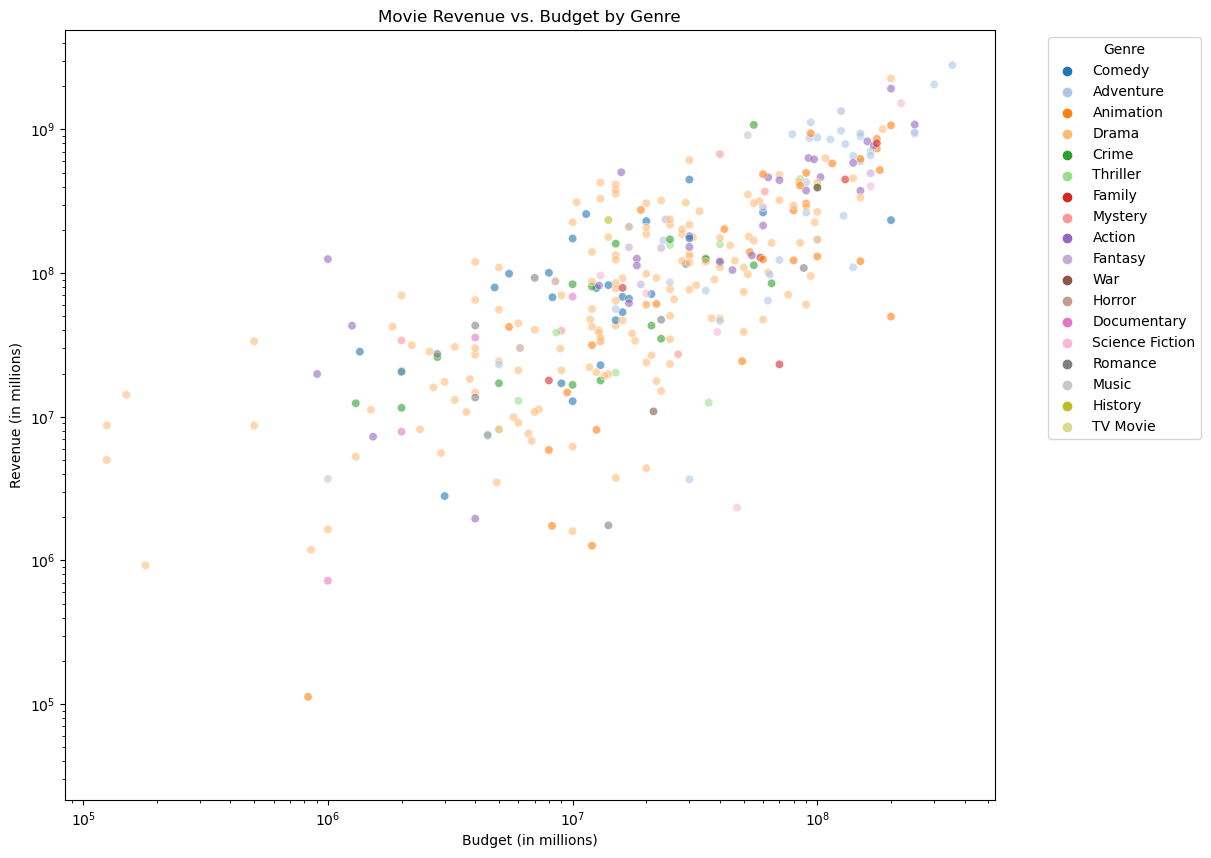

In [92]:
df_movies['Primary_Genre'] = df_movies['Genres'].apply(lambda x: x[0] if x else 'Unknown')

plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    data=df_movies,
    x='Budget',
    y='Revenue',
    hue='Primary_Genre',
    palette='tab20',  # This is a qualitative color palette with many colors
    alpha=0.6
)
plt.title('Movie Revenue vs. Budget by Genre')
plt.xlabel('Budget (in millions)')
plt.ylabel('Revenue (in millions)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
